# Dummy Model regression

In [461]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
from statsmodels.tools.eval_measures import stde


## Read the etl info results

In [462]:
df_info = pd.read_csv('../dataset_clean/options_csv_v1_etl.csv')
df_info

,remove_time_features,generic_features,remove_atypical_values,feature_combination,remove_feature_selection,remove_invalid_correlated_features
0,False,False,False,False,False,False


## Read the dataset

In [463]:
df = pd.read_csv('../dataset_clean/PlatteRiverWeir_features_v1_clean.csv')
df

,SensorTime,CaptureTime,Stage,Discharge,grayMean,graySigma,entropyMean,entropySigma,hMean,hSigma,...,WeirPt2X,WeirPt2Y,WwRawLineMin,WwRawLineMax,WwRawLineMean,WwRawLineSigma,WwCurveLineMin,WwCurveLineMax,WwCurveLineMean,WwCurveLineSigma
0,2012-06-09 13:15:00,2012-06-09T13:09:07,2.99,916.0,97.405096,39.623303,0.203417,0.979825,105.368375,41.572939,...,-1,-1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
1,2012-06-09 13:15:00,2012-06-09T13:10:29,2.99,916.0,104.066757,40.179745,0.206835,1.002624,112.399458,41.795584,...,-1,-1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
2,2012-06-09 13:45:00,2012-06-09T13:44:01,2.96,873.0,105.636831,40.533218,0.204756,0.994246,114.021526,42.145582,...,-1,-1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
3,2012-06-09 14:45:00,2012-06-09T14:44:30,2.94,846.0,104.418949,41.752678,0.202428,0.983170,112.612830,43.575351,...,-1,-1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
4,2012-06-09 15:45:00,2012-06-09T15:44:59,2.94,846.0,106.763541,44.442097,0.202661,0.989625,114.839424,46.302008,...,-1,-1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42054,2019-10-11 09:00:00,2019-10-11T08:59:53,2.54,434.0,82.872720,57.702652,0.221708,1.076393,87.260572,61.485334,...,2446,1900,9284.0,77521.0,38385.370066,15952.029728,0.0,70085.0,37550.894823,16444.401209
42055,2019-10-11 10:00:00,2019-10-11T09:59:52,2.54,434.0,89.028383,55.840861,0.233168,1.124774,94.175906,59.006132,...,2440,1900,10092.0,74614.0,40162.989292,15467.708856,0.0,70061.0,39397.339095,16009.008049
42056,2019-10-11 11:00:00,2019-10-11T10:59:52,2.54,434.0,94.722097,54.355753,0.240722,1.151833,100.534577,56.921028,...,2447,1900,7067.0,83260.0,42095.946590,16770.357949,0.0,76335.0,41350.006568,17489.374617
42057,2019-10-11 12:00:00,2019-10-11T11:59:53,2.54,434.0,96.693270,52.787629,0.244789,1.171987,102.891159,55.083532,...,2443,1900,6283.0,83045.0,45345.490954,17498.432849,0.0,78882.0,44553.920296,18268.294896


In [464]:
df['SensorTime'] = pd.to_datetime(df['SensorTime'])
df['Year'] = df['SensorTime'].dt.year
df['Month'] = df['SensorTime'].dt.month

In [465]:
df.dtypes

SensorTime          datetime64[ns]
CaptureTime                 object
Stage                      float64
Discharge                  float64
grayMean                   float64
graySigma                  float64
entropyMean                float64
entropySigma               float64
hMean                      float64
hSigma                     float64
sMean                      float64
sSigma                     float64
vMean                      float64
vSigma                     float64
areaFeatCount                int64
grayMean0                  float64
graySigma0                 float64
entropyMean0               float64
entropySigma0              float64
hMean0                     float64
hSigma0                    float64
sMean0                     float64
sSigma0                    float64
vMean0                     float64
vSigma0                    float64
grayMean1                  float64
graySigma1                 float64
entropyMean1               float64
entropySigma1       

### Remove outliers (values equal to zero seem to be incorrect looking at the images)

In [466]:
df = df[(df.Stage > 0) & (df.Discharge > 0)]

## Divide dataset to X and Y

In [467]:
df_train = df[(df.Year >= 2012) & (df.Year <= 2017)]
df_test = df[(df.Year >= 2018) & (df.Year <= 2019)]

In [468]:
df_train = df_train.drop(columns=["Year", "SensorTime", "CaptureTime"])
df_test = df_test.drop(columns=["Year", "SensorTime", "CaptureTime"])

In [469]:
y_train = df_train[["Stage", "Discharge"]]
X_train = df_train.drop(columns=["Stage", "Discharge"])
y_test = df_test[["Stage", "Discharge"]]
X_test = df_test.drop(columns=["Stage", "Discharge"])

In [470]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

## Train normal model

### Train model

In [471]:
dummy_regr = DummyRegressor(strategy="mean", quantile=0.4)

In [472]:
dummy_regr.fit(X_train, y_train)

DummyRegressor(quantile=0.4)

### Test model

In [473]:
dummy_regr.score(X_test, y_test)


-0.2023890547194146

In [474]:
y_pred = dummy_regr.predict(X_test)

In [475]:
def evaluation_of_model(y_real, y_predictions):
      print("R^2: ", r2_score(y_real, y_predictions))
      print("mse: ", mean_squared_error(y_real, y_predictions))
      print("rmse: ", mean_squared_error(y_real, y_predictions, squared=False))
      print("mae: ", mean_absolute_error(y_real, y_predictions))
      print("mape: ", mean_absolute_percentage_error(y_real, y_predictions))
      print("Error estandar: ", stde(y_real.squeeze(),
            y_predictions.squeeze(), ddof=2))


In [476]:
evaluation_of_model(y_test, y_pred)

R^2:  -0.2023890547194146
mse:  358624.66836268915
rmse:  423.78945528495314
mae:  370.77397691898614
mape:  1.7861659223930955
Error estandar:  [6.24980271e-01 7.59525461e+02]


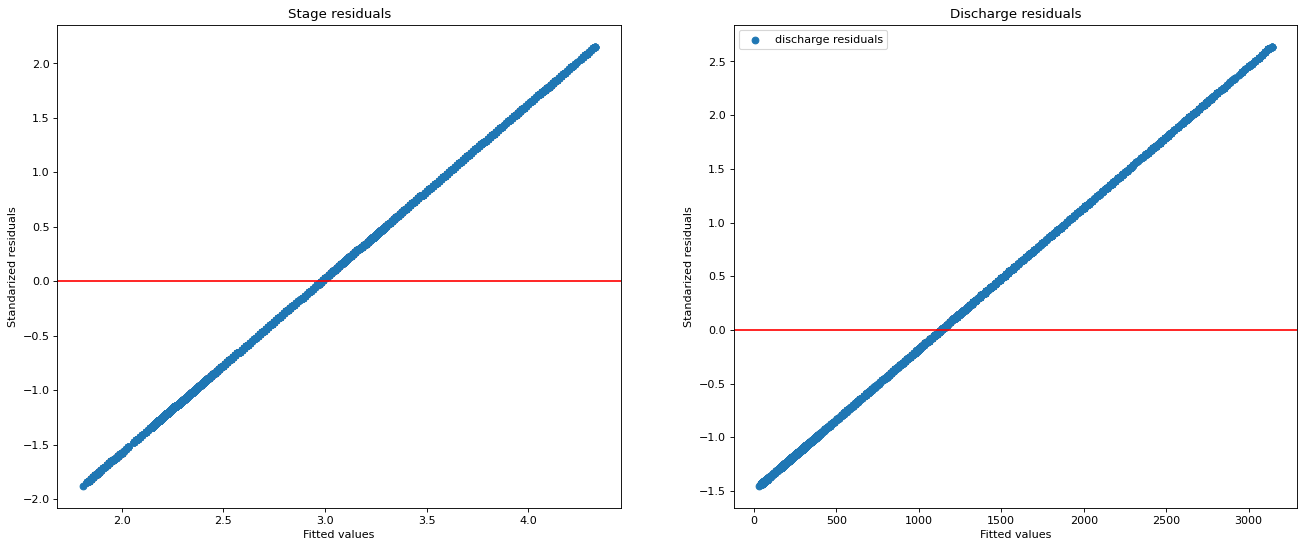

In [477]:
residuals = y_test - y_pred
residuals_std = residuals/residuals.std()

y_real_stage = y_test.Stage
residual_stage = residuals.Stage

y_real_discharge = y_test.Discharge
residual_discharge = residuals.Discharge


figure, ax = plt.subplots(ncols=2, figsize=(20, 8), dpi=80)

ax[0].scatter(y_real_stage, residual_stage / residual_stage.std(), label="stage residuals")
ax[1].scatter(y_real_discharge, residual_discharge / residual_discharge.std(), label="discharge residuals")
ax[0].axhline(y=0.0, color='r', linestyle='-')
ax[1].axhline(y=0.0, color='r', linestyle='-')

ax[0].set_title("Stage residuals")
ax[1].set_title("Discharge residuals")

ax[0].set_xlabel("Fitted values")
ax[1].set_xlabel("Fitted values")
ax[0].set_ylabel("Standarized residuals")
ax[1].set_ylabel("Standarized residuals")

plt.legend()
plt.show()

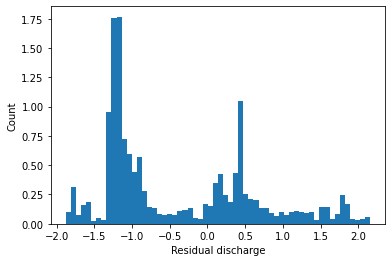

In [478]:
plt.hist(residual_stage / residual_stage.std(), density=True, bins = 60)
plt.ylabel('Count')
plt.xlabel('Residual discharge');
plt.show()

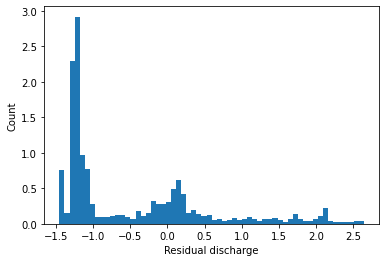

In [479]:
plt.hist(residual_discharge / residual_discharge.std(), density=True, bins = 60)
plt.ylabel('Count')
plt.xlabel('Residual discharge');
plt.show()

## Train model based on months

### Train model

In [480]:
dummy_regr = DummyRegressor(strategy="mean", quantile=0.4)

In [481]:
predictions = np.array([[0, 0]])
real_values = np.array([[0, 0]])

In [482]:
for i in range(1, 13):
    # select data
    train_month = df_train[df_train["Month"] == i]
    y_train = train_month[["Stage", "Discharge"]]
    X_train = train_month.drop(columns=["Stage", "Discharge"])
    test_month = df_test[df_test["Month"] == i]
    y_test = test_month[["Stage", "Discharge"]]
    X_test = test_month.drop(columns=["Stage", "Discharge"])
    # train model

    dummy_regr.fit(X_train, y_train)

    print(dummy_regr.score(X_test, y_test))

    y_pred = dummy_regr.predict(X_test)

    predictions = np.concatenate((predictions, y_pred), axis=0)
    real_values = np.concatenate((real_values, y_test.values), axis=0)

-10.122700928549037
-51.69799472465748
-8.04899556399574
-14.935018690268084
-16.78827884366023
-2.7418682106232
-0.037208642384348956
-0.27024063543100896
-0.11962609738099839
-0.13232286510159386
-14.714901984910105
-15.3077460903396


### Evaluate model

In [483]:
evaluation_of_model(real_values, predictions)


R^2:  -0.19985084865917296
mse:  424660.9676028854
rmse:  461.09431274157595
mae:  291.4238578218954
mape:  1.3663800561962285
Error estandar:  [5.36665015e-01 8.26682569e+02]


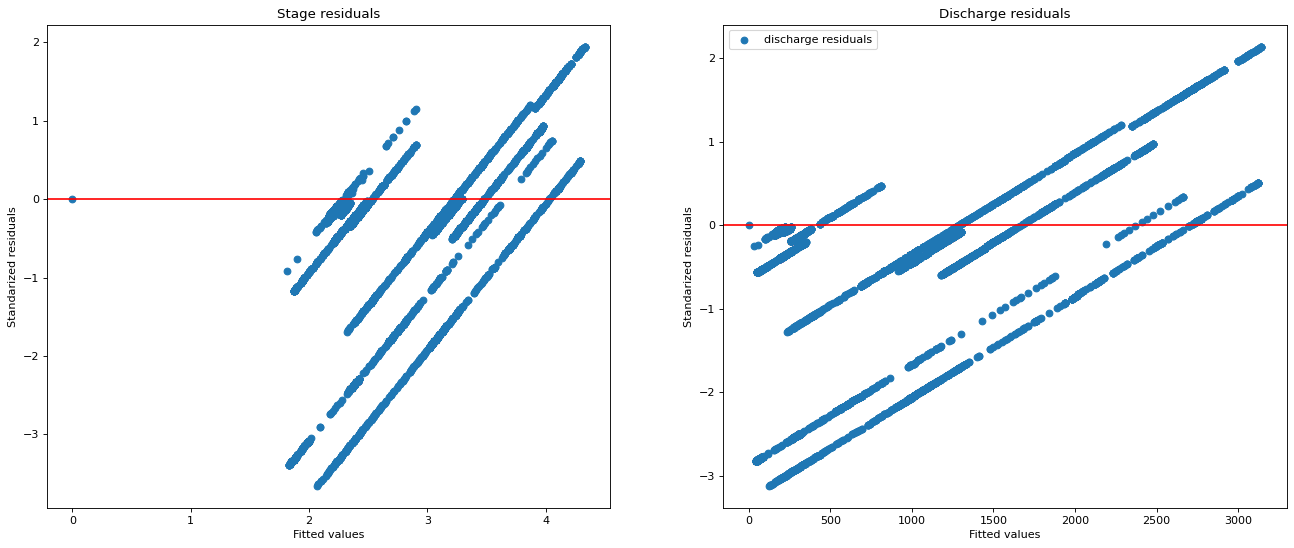

In [484]:
residuals = real_values - predictions
residuals_std = residuals/residuals.std()

y_real_stage = np.array([i[0] for i in real_values])
residual_stage = np.array([i[0] for i in residuals])

y_real_discharge = np.array([i[1] for i in real_values])
residual_discharge = np.array([i[1] for i in residuals])


figure, ax = plt.subplots(ncols=2, figsize=(20, 8), dpi=80)

ax[0].scatter(y_real_stage, residual_stage / residual_stage.std(), label="stage residuals")
ax[1].scatter(y_real_discharge, residual_discharge / residual_discharge.std(), label="discharge residuals")
ax[0].axhline(y=0.0, color='r', linestyle='-')
ax[1].axhline(y=0.0, color='r', linestyle='-')

ax[0].set_title("Stage residuals")
ax[1].set_title("Discharge residuals")

ax[0].set_xlabel("Fitted values")
ax[1].set_xlabel("Fitted values")
ax[0].set_ylabel("Standarized residuals")
ax[1].set_ylabel("Standarized residuals")

plt.legend()
plt.show()

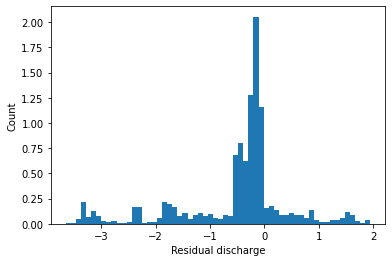

In [485]:
plt.hist(residual_stage / residual_stage.std(), density=True, bins = 60)
plt.ylabel('Count')
plt.xlabel('Residual discharge');
plt.show()

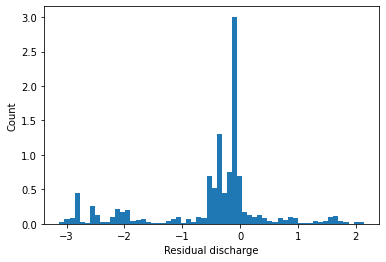

In [486]:
plt.hist(residual_discharge / residual_discharge.std(), density=True, bins = 60)
plt.ylabel('Count')
plt.xlabel('Residual discharge');
plt.show()